## Factor Beta Toy Case - Linear Regression from Scratch

The goal of this case is to estimate a simple beta of an asset to a benchmark using linear regression, similar to how risk/portfolio teams measure sensitivity to a market or factor.

In [66]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# random data
np.random.seed(0)

# number of observations (one year of daily returns)
n = 250

# mock daily benchmark returns (X variable)
benchmark_return = np.random.normal(loc=0.0005, scale=0.01, size=n)

# epsilon - idiosyncratic risk (random asset-specific movement)
eps = np.random.normal(loc=0.0, scale=0.01, size=n)

# asset returns with beta ~0.6
true_alpha = 0.0002
true_beta = 0.6

asset_return = true_alpha + true_beta * benchmark_return + eps

benchmark_return.shape, asset_return.shape

((250,), (250,))

## Estimating Beta with The Normal Equation

In [11]:
# develop matrix with intercept
X = np.column_stack([np.ones_like(benchmark_return), benchmark_return]) # shape (n, 2)
y = asset_return

# normal equation: beta_hat = (X^T X)^(-1) X^T y
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
Xty = X.T @ y

beta_hat = XtX_inv @ Xty # [alpha_hat, beta_hat]
alpha_hat, beta_hat_est = beta_hat[0], beta_hat[1]
alpha_hat, beta_hat_est

(-0.0005194199498696605, 0.4710260267122074)

## Model Fit: MSE & R²

In [18]:
y_pred = X @ beta_hat

mse = np.mean((y - y_pred) ** 2)

ss_tot = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - ss_res / ss_tot

mse, r2

(9.773839944521705e-05, 0.18382832930707638)

## Visualizing The Relationship

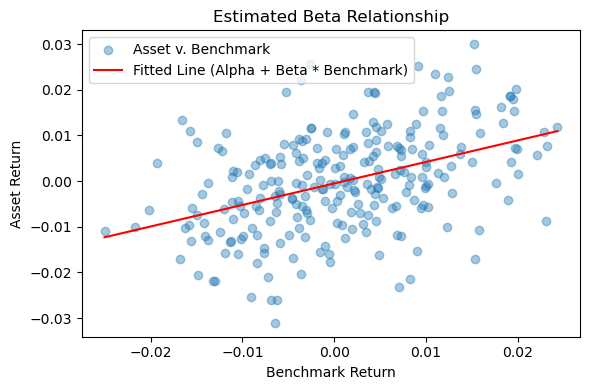

In [68]:
plt.figure(figsize=(6, 4))
plt.scatter(benchmark_return, asset_return, alpha =0.4, label="Asset v. Benchmark")

# sort
order = np.argsort(benchmark_return)
plt.plot(
    benchmark_return[order[,
    y_pred[order],
    color="red",
    label="Fitted Line (Alpha + Beta * Benchmark)"
)

plt.xlabel("Benchmark Return")
plt.ylabel("Asset Return")
plt.title("Estimated Beta Relationship")
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
# printing values for clarity
print(f"True alpha:      {true_alpha:.6f}")
print(f"Estimated alpha:{alpha_hat:.6f}")
print(f"True beta:       {true_beta:.3f}")
print(f"Estimated beta:  {beta_hat_est:.3f}")
print(f"MSE:             {mse:.6f}")
print(f"R²:              {r2:.4f}")

True alpha:      0.000200
Estimated alpha:-0.000519
True beta:       0.600
Estimated beta:  0.471
MSE:             0.000098
R²:              0.1838


## Interpretation

- Alpha used in simulation: 0.0002; estimated alpha: -0.0005
- Beta used in simulation: 0.6; estimated beta: 0.471
- R²: 0.1838 = low fraction of variation in asset returns explained by benchmark

## Risk/Portfolio Meaning
- Beta = 0.6 suggests this asset/fund is less volatile than the benchmark, moving ~60% as much on average
- A risk team would report this beta in risk reports and factor exposures as well as use it for scenario analysis

## Possible Extensions
- Use real ETF / index data instead of simulated returns (e.g. SPY vs a low-volatility ETF)
- Extend to a multi-factor regression (market + size + value factors)
- Compute rolling betas over time to see how exposure drifts
- Compare regression-based beta to other risk measures (volatility, VaR)